<a href="https://colab.research.google.com/github/jmaydwell1/Tensorflow-Deep-Learning/blob/main/01_neural_network_regression_in_tensorflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


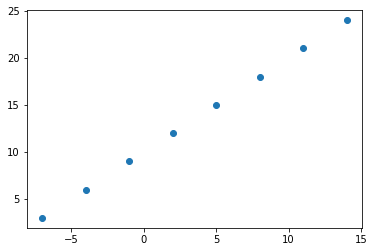

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features 
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x,y)

In [3]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

In [5]:
# Set random seed
tf.random.set_seed(42)

# Create modelusing the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(x,y, epochs=5) #this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

What do you think the outcome should be if we passed our model an x value of 17.0?

In [7]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 148ms/step


array([[12.716021]], dtype=float32)

In [8]:
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(x,axis=-1), y, epochs=100) # train for 100 epochs not 5

Epoch 1/100
1/1 [==============================] - 1s 747ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 42ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================

In [9]:
# Remind ourselves ourselves of what x and y are
x, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [10]:
# Try and predict what y would be if x was 17.0
model.predict([17.0]) # the right answr is 27.0 (y= x + 10)

1/1 [==============================] - 0s 255ms/step


array([[30.158512]], dtype=float32)

We get closer this time but we can still be better

In [11]:
# Make a bigger data set
x = np.arange(-100,100,4)
x

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [12]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [13]:
len(x)

50

In [14]:
# Split data into train and test sets
x_train = x[:40] # first 40 examples (80% of data)
y_train = y[:40] # last 10 examples (20% of data)

x_test = x[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(x_train), len(x_test)

(40, 10)

In [15]:
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Alongside summary, you can also view a 2D plot of the model using plot_model()

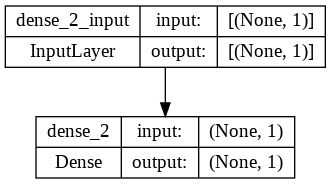

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [20]:
y_preds = model.predict(x_test)
y_preds

1/1 [==============================] - 0s 86ms/step


array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [21]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds):
  
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();


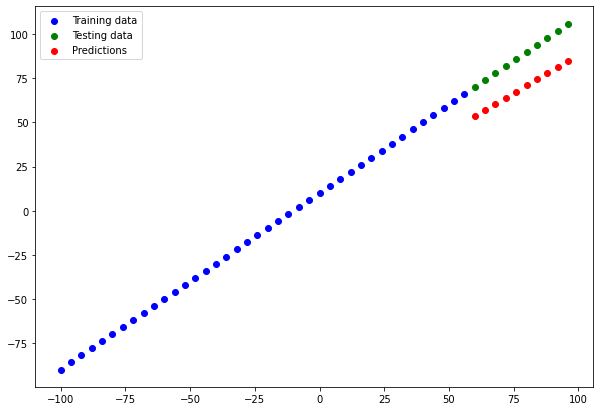

In [22]:
plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=y_preds)

In [23]:
tf.random.set_seed(42)

# Replicate first model and add 4 extra layers
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 124ms/step


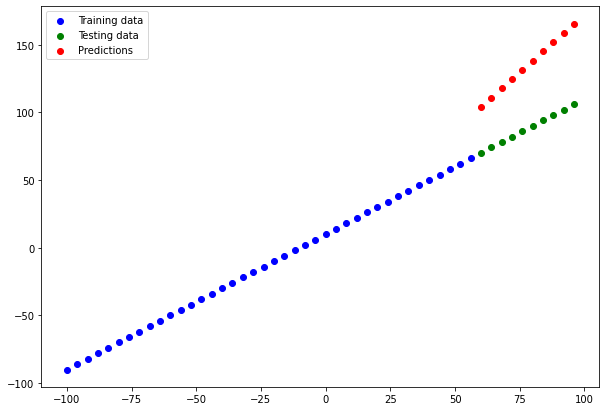

In [24]:
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [25]:
def mae(y_test, y_pred):
  """
  Calculates mean absolute error between y_test and y_preds
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Cacluates mean squared error between y_test and y_preds
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [26]:
# calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(46.737812, 2250.9536)

In [27]:
tf.random.set_seed(42)

# Replicate first model and add 4 extra layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 68ms/step


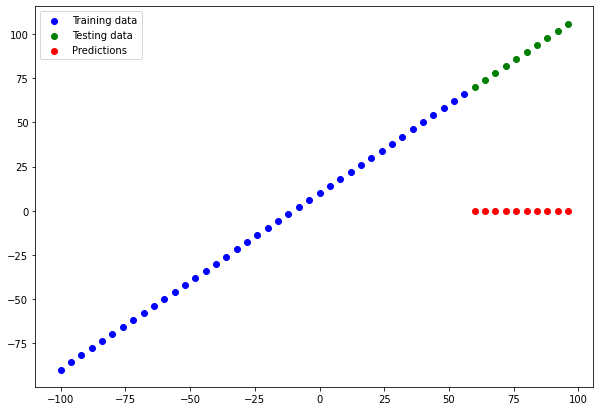

In [28]:
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [29]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(88.09469, 7892.6797)

In [30]:
model_results = [["model", mae, mse],
                 ["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2]]

In [31]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model,<function mae at 0x7fae3bcf5e60>,<function mse at 0x7fae3bcf5f80>
1,model_1,46.737812,2250.953613
2,model_2,88.094688,7892.679688


In [32]:
# Save a model using the SavedModel format
model_1.save('best_model_SavedModel_format')

In [33]:
!ls best_model_SavedModel__format

ls: cannot access 'best_model_SavedModel__format': No such file or directory


In [34]:
model_1.save("best_model_HDF5_format.h5")

In [35]:
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [36]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [38]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [40]:
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [41]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [42]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_1)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit model
insurance_model.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13302.8369 - mae: 13302.8369
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12482.7471 - mae: 12482.7471
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12186.3643 - mae: 12186.3643
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12116.8340 - mae: 12116.8340
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12013.0332 - mae: 12013.0332
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11846.9951 - mae: 11846.9951
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 11557.4883 - mae: 11557.4883
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 11086.1338 - mae: 11086.1338
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10478.3955 - mae: 10478.3955
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9833.294

In [44]:
# Check the results of the insurance model
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8932.8223 - mae: 8932.8223


[8932.822265625, 8932.822265625]

In [48]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [49]:
# Evaluate our larger model
insurance_model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8627.9434 - mae: 8627.9434


[8627.943359375, 8627.943359375]

Text(0.5, 0, 'epochs')

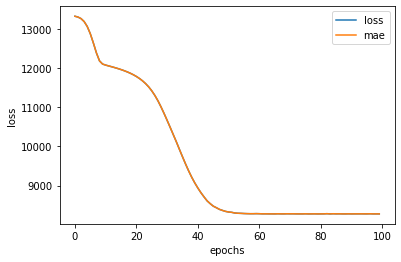

In [50]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [51]:
# Train for 100 more epochs
history_1 = insurance_model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

In [52]:
# Evaluate the model trained for 200 total epochs
insurance_model_1_loss, insurance_model_1_mae = insurance_model_1.evaluate(x_test, y_test)
insurance_model_1_loss, insurance_model_1_mae

9/9 [==============================] - 0s 4ms/step - loss: 8627.7393 - mae: 8627.7393


(8627.7392578125, 8627.7392578125)

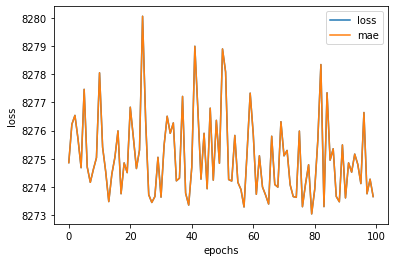

In [53]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [55]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

Now we've normalize it and one-hot encoded it, what does our data look like now?

In [61]:
# None-normalized and none-one-hot encoded data example
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [62]:
# Normalized and one-hot encoded example
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [63]:
# Normalized/one-hot encoded shape is larger because of the extra columns
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))